In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 소수점 아래 둘째 자리까지 표시
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'


import statsmodels.api as sm # 통계
from statsmodels.formula.api import ols # 통계 , 고수준 인터페이스 제공
from sklearn.metrics import confusion_matrix, f1_score 
from sklearn.tree import DecisionTreeClassifier, export_graphviz # 의사결정나무


from sklearn.model_selection import train_test_split 
from collections import Counter 

### 데이터 불러오기

In [2]:
data = pd.read_csv('../data/log_std_data.csv')
data.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,...,transaction_cnt,age,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,use_area_price,use_area,transaction_year
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,1.55,201401,2,180000.00,1.08,2005,...,0.66,-1.21,0,0,0,1,0,8.31,145.83,-1.39
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,-0.37,201401,2,68000.00,-0.54,2008,...,-1.36,-1.45,0,1,0,0,0,7.89,84.06,-1.39
2,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,2.03,201401,4,155000.00,-0.54,1983,...,0.63,0.54,0,0,0,1,0,8.06,161.36,-1.39
3,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),-1.96,201401,4,27000.00,1.40,2004,...,-0.38,-1.13,1,0,0,0,0,7.90,33.11,-1.39
4,TRAIN_0102,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,-1.12,201401,4,37400.00,-0.30,2004,...,-0.64,-1.13,1,0,0,0,0,7.63,59.98,-1.39


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6089 non-null   object 
 1   sigungu                 6089 non-null   object 
 2   jibun                   6089 non-null   object 
 3   apt_name                6089 non-null   object 
 4   exclusive_use_area      6089 non-null   float64
 5   transaction_year_month  6089 non-null   int64  
 6   transaction_day         6089 non-null   int64  
 7   transaction_real_price  5893 non-null   float64
 8   floor                   6089 non-null   float64
 9   year_of_completion      6089 non-null   int64  
 10  train_test              6089 non-null   object 
 11  transaction_date        6089 non-null   object 
 12  소비심리지수                  6089 non-null   float64
 13  아파트 매매 실거래 가격 지수        6089 non-null   float64
 14  기준금리                    6089 non-null   

In [4]:
data.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0', 'use_area_price', 'use_area', 'transaction_year'],
      dtype='object')

In [5]:
columns = [ 'exclusive_use_area','floor', 'year_of_completion','소비심리지수', '아파트 매매 실거래 가격 지수', 
           '기준금리', 'GDP 성장률', 'apartment_id','recent_price', 'recent_jeonse', 'age', 
           'transaction_cnt',  'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0','cluster_4.0']

# 모델링

In [7]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(data.loc[(data['train_test'] == 'train'), columns], data.loc[(data['train_test'] == 'train'), 
                                                                                                               'transaction_real_price'], shuffle = False, random_state = 42)

In [8]:
# Linear Regression 구축
model = sm.OLS(train_y,train_x, random_state = 42)
model_trained = model.fit(random_state = 42)

In [9]:
train_x.iloc[0]

exclusive_use_area      1.55
floor                   1.08
year_of_completion   2005.00
소비심리지수                 -0.75
아파트 매매 실거래 가격 지수       -1.45
기준금리                    1.73
GDP 성장률                 0.37
apartment_id           20.00
recent_price            0.34
recent_jeonse           0.60
age                    -1.21
transaction_cnt         0.66
cluster_0.0             0.00
cluster_1.0             0.00
cluster_2.0             0.00
cluster_3.0             1.00
cluster_4.0             0.00
Name: 0, dtype: float64

In [10]:
print(model_trained.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.957
Model:                                OLS   Adj. R-squared:                  0.957
Method:                     Least Squares   F-statistic:                     6109.
Date:                    Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                            18:29:14   Log-Likelihood:                -47829.
No. Observations:                    4419   AIC:                         9.569e+04
Df Residuals:                        4402   BIC:                         9.580e+04
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [12]:
# 다중공선성 이슈 => 상관관계 확인
train_x.corr() 

,exclusive_use_area,floor,year_of_completion,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,age,transaction_cnt,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0
exclusive_use_area,1.00,0.01,0.08,-0.03,0.05,-0.01,-0.01,-0.01,0.75,0.77,-0.07,-0.15,-0.43,-0.12,-0.16,0.49,0.11
floor,0.01,1.00,0.24,-0.01,-0.02,-0.01,0.00,-0.16,0.09,0.10,-0.24,0.05,0.08,-0.08,-0.05,0.08,0.01
year_of_completion,0.08,0.24,1.00,-0.00,0.03,-0.02,-0.00,-0.49,0.02,0.27,-0.99,-0.42,0.25,0.32,-0.43,0.03,0.06
소비심리지수,-0.03,-0.01,-0.00,1.00,-0.38,0.03,0.01,-0.01,-0.19,-0.05,-0.04,0.15,-0.01,0.06,0.01,-0.06,-0.01
아파트 매매 실거래 가격 지수,0.05,-0.02,0.03,-0.38,1.00,-0.68,-0.05,0.05,0.44,0.21,0.07,-0.02,-0.02,-0.08,0.03,0.05,-0.01
기준금리,-0.01,-0.01,-0.02,0.03,-0.68,1.00,-0.05,-0.03,-0.25,-0.19,-0.06,-0.09,0.04,0.05,-0.03,-0.03,0.00
GDP 성장률,-0.01,0.00,-0.00,0.01,-0.05,-0.05,1.00,-0.03,-0.03,-0.01,-0.01,0.02,-0.02,0.03,0.01,-0.03,-0.01
apartment_id,-0.01,-0.16,-0.49,-0.01,0.05,-0.03,-0.03,1.00,-0.06,-0.26,0.49,0.18,-0.07,-0.23,0.25,-0.03,-0.00
recent_price,0.75,0.09,0.02,-0.19,0.44,-0.25,-0.03,-0.06,1.00,0.79,0.02,0.08,-0.45,-0.34,-0.11,0.63,0.15
recent_jeonse,0.77,0.10,0.27,-0.05,0.21,-0.19,-0.01,-0.26,0.79,1.00,-0.25,-0.05,-0.57,-0.02,-0.20,0.53,0.08


- 완공년도 변수와 age 변수의 상관성이 매우 높아 완공년도 변수를 제외함

In [64]:
columns = [ 'exclusive_use_area','floor', 'age','소비심리지수', '아파트 매매 실거래 가격 지수', 
           '기준금리', 'GDP 성장률', 'recent_price', 'recent_jeonse',
           'transaction_cnt', 'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0','cluster_4.0']

In [65]:
# data split
train_x, val_x, train_y, val_y = train_test_split(data.loc[(data['train_test'] == 'train'), columns], data.loc[(data['train_test'] == 'train'), 
                                                                                                               'transaction_real_price'], shuffle = False, random_state = 42)

In [66]:
# Linear Regression 구축
model = sm.OLS(train_y,train_x, random_state = 42)
model_trained = model.fit(random_state = 42)

# 회귀분석
1. 모델 개요
- 아파트의 실 거래가을 종속변수로 하여, 아파트의 특성 및 경제 지표가 실거래가에 미치는 영향을 파악하기 위해 선형 회귀 모델을 구축함
- 4419개의 관측치 사용, 15개의 독립변수 포함

2. 모델 요약
- 결정계수(R-squared): 0.954
- 조정 결정계수(Adj. R-squared): 0.954
- F-통계량: 6568, Prob(F-statistic): 0.00
- 모델의 결정계수와 수정된 결정계수 모두 매우 높은 편. 모델이 데이터의 변동성을 잘 표현하고 있다고 할 수 있지만, 과적합이 의심됨 
- F-통계량의 p-value가 0.00으로 보아 모델은 통계적으로 유의미함

3. 변수별 분석
- 대부분의 변수들이 p-value < 0.05를 만족하여 통계적으로 유의미함을 확인함
- 특히, 아파트 매매 실거래 가격 지수,최근 거래와 관련된 변수, 클러스터 등의 변수가 높은 계수를 보이며, 아파트 가격에 큰 영향을 미치고 있음
- 반면, 건령(age)과 GDP 성장률은 통계적으로 유의미하지 않은 것으로 나타남.

In [69]:
print(model_trained.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.954
Model:                                OLS   Adj. R-squared:                  0.954
Method:                     Least Squares   F-statistic:                     6510.
Date:                    Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                            18:40:29   Log-Likelihood:                -47978.
No. Observations:                    4419   AIC:                         9.599e+04
Df Residuals:                        4404   BIC:                         9.608e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
pred_y = model_trained.predict(val_x)
pred_y[:5]

4419   156964.41
4420   150116.57
4421   260462.24
4422   206664.76
4423   202507.22
dtype: float64

In [72]:
val_y[:5]

4419   140000.00
4420   151200.00
4421   256000.00
4422   191000.00
4423   191000.00
Name: transaction_real_price, dtype: float64

In [73]:
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(val_y, pred_y))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(val_y, pred_y)))
print('Training R2: {:.3f}'.format(r2_score(val_y, pred_y)))

Training RMSE: 29397.007
Training MAE: 21945.467
Training R2: 0.902


### 상위 30% 와 하위 30% 아파트 실거래가 비교
- 상위 30%와 하위 30%로 나눠 실거래가의 중요 변수를 알아보기

In [74]:
train = data[data['train_test'] == 'train']

In [75]:
train.shape

(5893, 29)

In [76]:
# Problem Convert
# Regression to Classifcation

per_70 = np.percentile(train['transaction_real_price'],70)
per_30 = np.percentile(train['transaction_real_price'],30)
mean = round(np.mean(train['transaction_real_price']),0)

print(">>>> 30 Percentile : {}".format(per_30))
print(">>>> mean : {}".format(mean))
print(">>>> 70 Percentile : {}".format(per_70))

>>>> 30 Percentile : 108259.99999999999
>>>> mean : 155997.0
>>>> 70 Percentile : 188000.0


>>>> 30 Percentile : 108259.99999999999
>>>> 70 Percentile : 188000.0


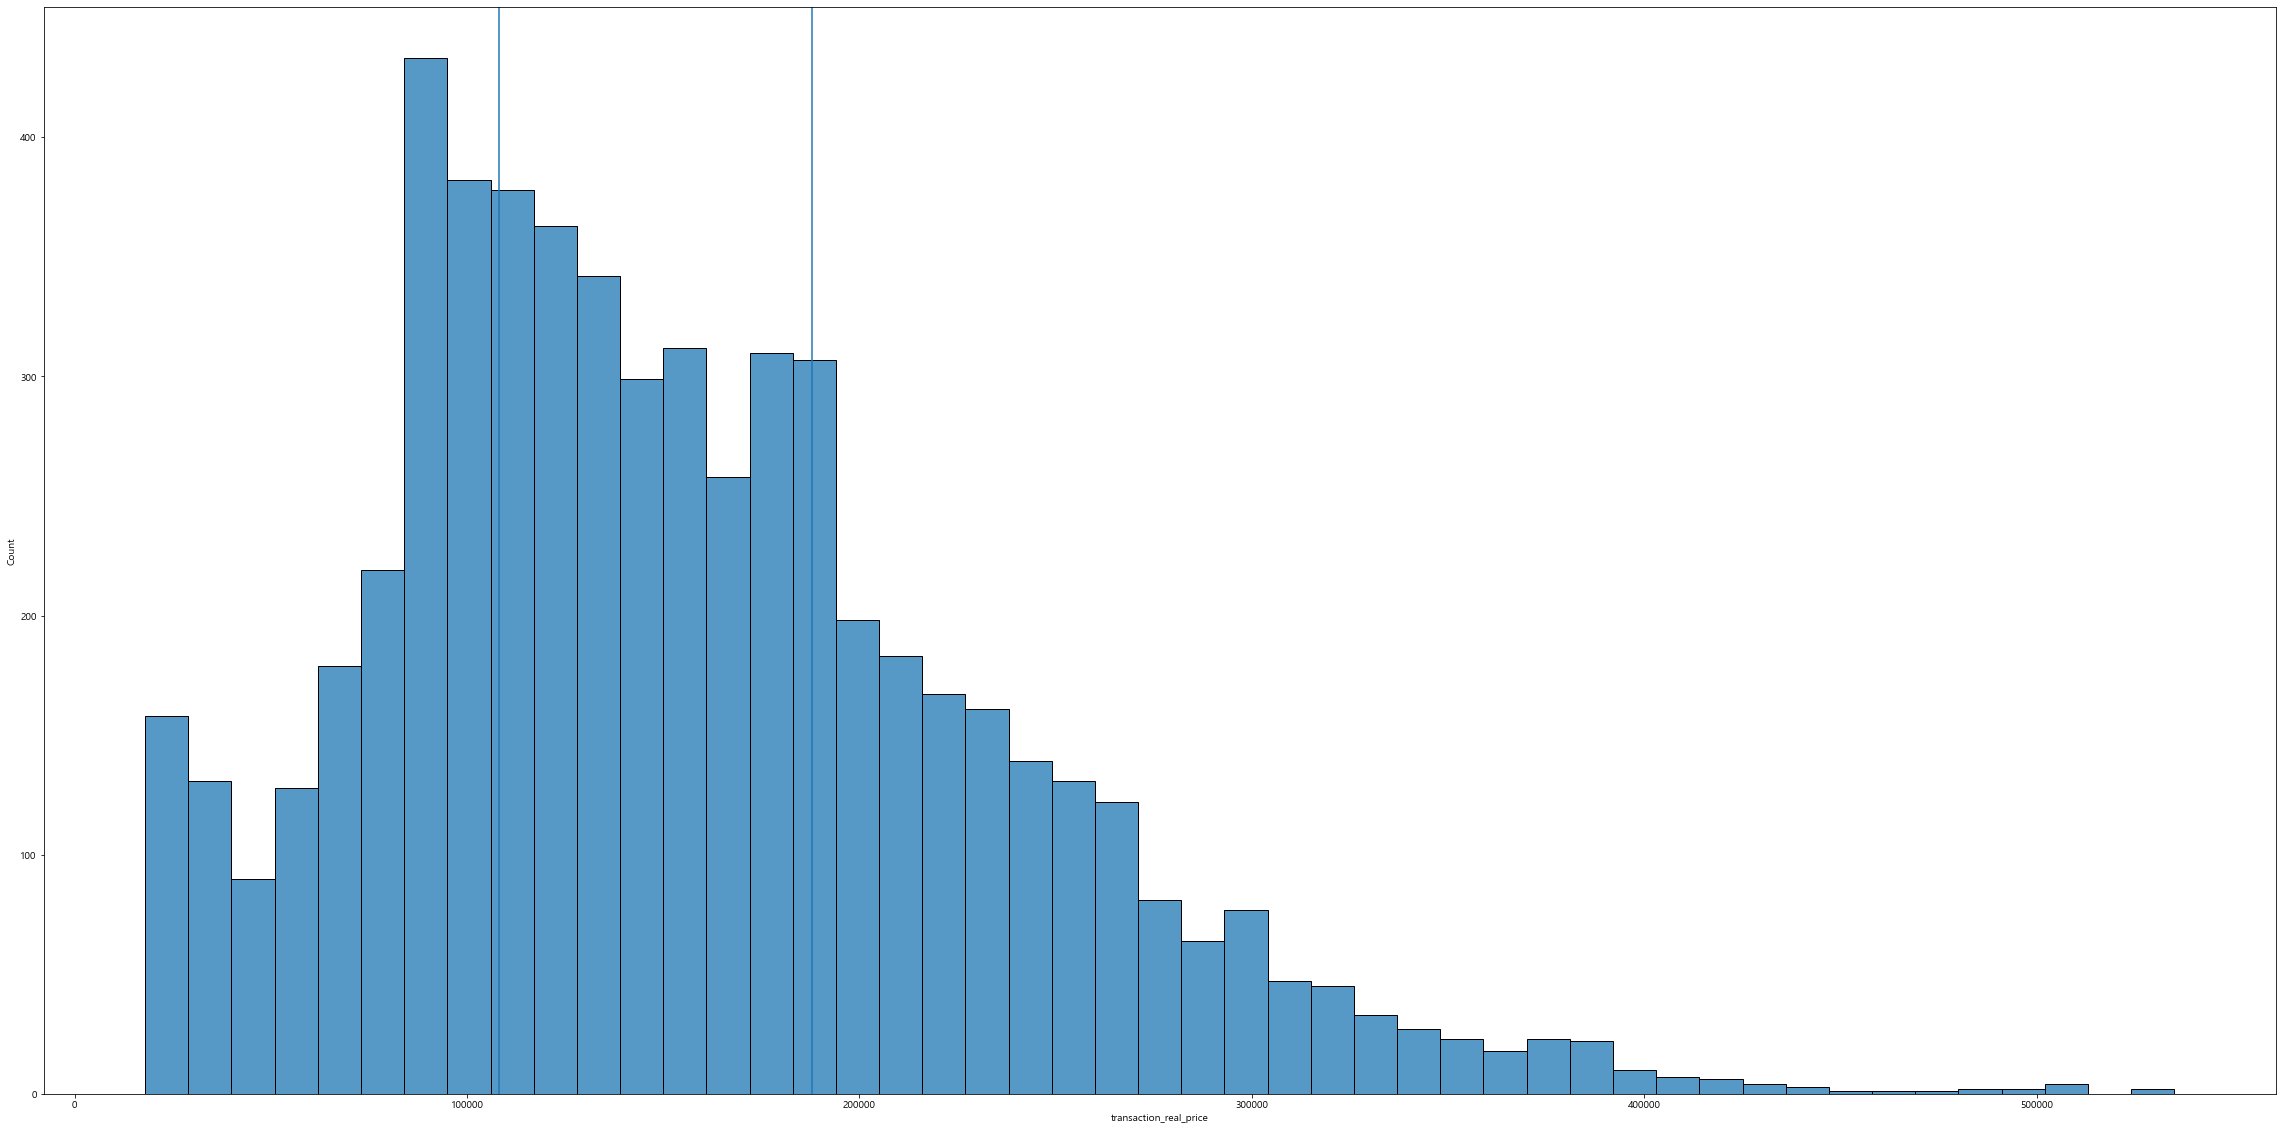

In [77]:
sns.histplot(train['transaction_real_price'])

plt.axvline(np.percentile(train['transaction_real_price'],30))
plt.axvline(np.percentile(train['transaction_real_price'],70))
print(">>>> 30 Percentile : {}".format(per_30))
print(">>>> 70 Percentile : {}".format(per_70))
plt.show()

In [78]:
train[train['transaction_real_price'] >= per_70].shape

(1788, 29)

In [79]:
train[train['transaction_real_price'] <= per_30].shape

(1768, 29)

In [80]:
# 상위 30%와 하위 30% 데이터 추출하기
data_30 = data[(data['transaction_real_price'] <= per_30) | (data['transaction_real_price'] >= per_70)]

print('Data shape : {}'.format(data_30.shape))

Data shape : (3556, 29)


In [81]:
data.shape

(6089, 29)

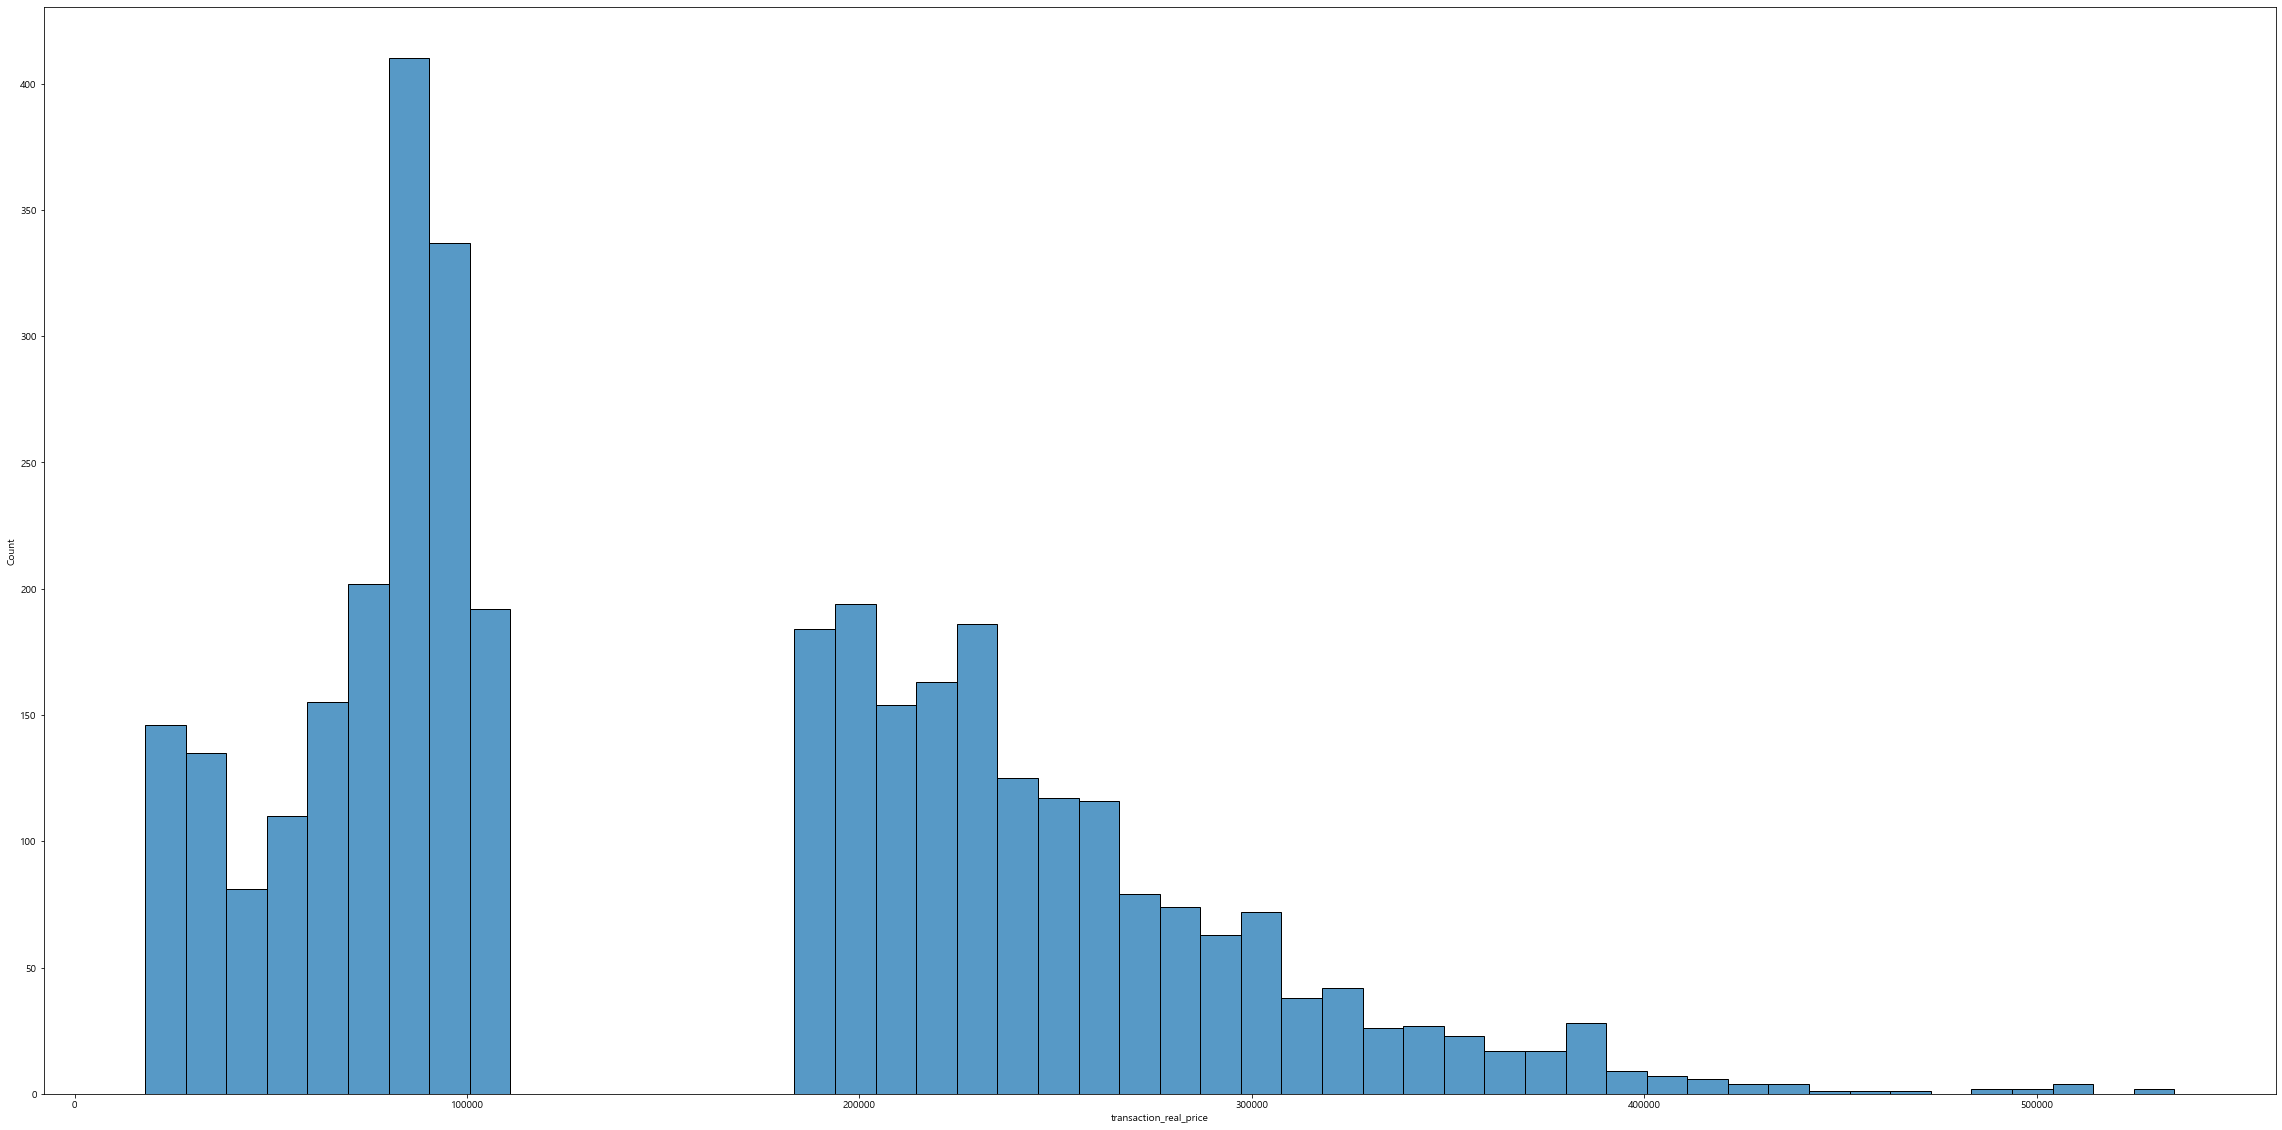

In [109]:
sns.histplot(data_30['transaction_real_price'], bins = 50)

plt.show()

## 데이터라벨링
- 상위/하위 집값을 위해 데이터 분리하기

In [124]:
# 라벨 할당 
## 상위 30% : 1, 하위 30% : 0
data_30['Label'] = 3
data_30['Label'].iloc[np.where(data_30['transaction_real_price'] >= per_70)[0]] = 1
data_30['Label'].iloc[np.where(data_30['transaction_real_price'] <= per_30)[0]] = 0
print("Unique Label : {}".format(set(data_30['Label']))) 

Unique Label : {0, 1}


In [125]:
data_30.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0', 'use_area_price', 'use_area', 'transaction_year',
       'Label'],
      dtype='object')

In [126]:
# Data split
Y = data_30['Label']
X = data_30.drop(columns=['transaction_real_price', 'Label'])

idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, shuffle = False)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx))) 

>>>> # of Train data : 2489
>>>> # of valid data : 1067


In [127]:
X

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,train_test,...,transaction_cnt,age,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,use_area_price,use_area,transaction_year
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,-0.37,201401,2,-0.54,2008,train,...,-1.36,-1.45,0,1,0,0,0,7.89,84.06,-1.39
3,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),-1.96,201401,4,1.40,2004,train,...,-0.38,-1.13,1,0,0,0,0,7.90,33.11,-1.39
4,TRAIN_0102,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,-1.12,201401,4,-0.30,2004,train,...,-0.64,-1.13,1,0,0,0,0,7.63,59.98,-1.39
5,TRAIN_0110,서울특별시 강남구 대치동,1014-3,대치삼성,0.04,201401,4,0.66,2000,train,...,0.45,-0.81,0,1,0,0,0,8.13,97.35,-1.39
6,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,-0.35,201401,4,0.09,1999,train,...,-0.64,-0.73,0,1,0,0,0,7.95,84.91,-1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,TRAIN_5952,서울특별시 강남구 대치동,316,은마,-0.60,202212,16,0.40,1979,train,...,-0.38,1.50,0,0,1,0,0,9.00,76.79,2.43
5885,TRAIN_5953,서울특별시 강남구 대치동,316,은마,-0.60,202212,22,0.66,1979,train,...,-0.38,1.50,0,0,1,0,0,9.01,76.79,2.43
5887,TRAIN_5955,서울특별시 강남구 대치동,316,은마,-0.36,202212,24,0.40,1979,train,...,-0.18,1.50,0,0,1,0,0,9.06,84.43,2.43
5888,TRAIN_5956,서울특별시 강남구 대치동,316,은마,-0.36,202212,26,0.09,1979,train,...,-0.10,1.50,0,0,1,0,0,9.11,84.43,2.43


In [128]:
X.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'floor',
       'year_of_completion', 'train_test', 'transaction_date', '소비심리지수',
       '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id', 'recent_price',
       'recent_jeonse', 'transaction_cnt', 'age', 'cluster_0.0', 'cluster_1.0',
       'cluster_2.0', 'cluster_3.0', 'cluster_4.0', 'use_area_price',
       'use_area', 'transaction_year'],
      dtype='object')

In [129]:
columns = [ 'exclusive_use_area','floor', 'age','소비심리지수', '아파트 매매 실거래 가격 지수', 
           '기준금리', 'GDP 성장률', 'recent_price', 'recent_jeonse',
           'transaction_cnt', 'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0','cluster_4.0']

In [130]:
X = X[columns].copy()

In [131]:
# Parameter Searching ==> Depth 2 ~ 5
for i in range(2,5,1):
    print(">>>> Depth {}".format(i))

    model = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    model.fit(X.iloc[train_idx], Y.iloc[train_idx])

    # Train Acc
    y_pre_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
    print("Train Confusion Matrix")
    print(cm_train)
    print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))

    # Test Acc
    y_pre_test = model.predict(X.iloc[valid_idx])
    cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
    print("Valid Confusion Matrix")
    print(cm_test)
    print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
    print("-----------------------------------------------------------------------")
    print("-----------------------------------------------------------------------")


>>>> Depth 2
Train Confusion Matrix
[[1597    1]
 [  11  880]]
Train Acc : 0.9951787866613098
Valid Confusion Matrix
[[170   0]
 [ 57 840]]
TesT Acc : 0.9465791940018744
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 3
Train Confusion Matrix
[[1598    0]
 [   3  888]]
Train Acc : 0.9987946966653274
Valid Confusion Matrix
[[170   0]
 [ 11 886]]
TesT Acc : 0.9896907216494846
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 4
Train Confusion Matrix
[[1598    0]
 [   0  891]]
Train Acc : 1.0
Valid Confusion Matrix
[[170   0]
 [ 11 886]]
TesT Acc : 0.9896907216494846
-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [132]:
# Depth가 깊어질 수록 정확도는 높게 나타남
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X.iloc[train_idx], Y.iloc[train_idx])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

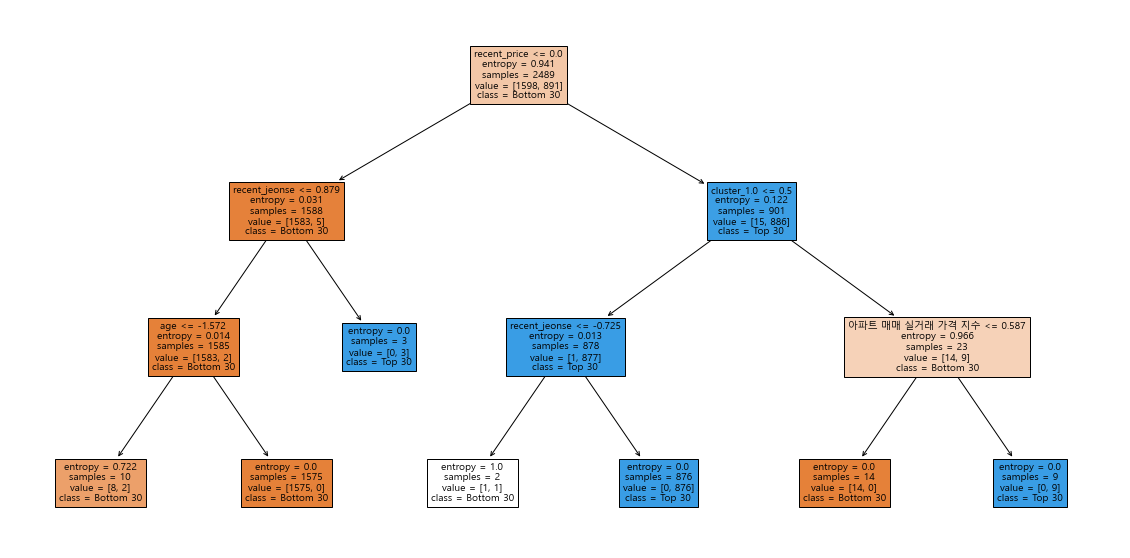

In [133]:
 from sklearn import tree
# Creating the tree plot
# Creating the tree plot (left = True, Right = False)
plt.figure(figsize= (20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names = ['Bottom 30','Top 30'])
plt.rcParams['figure.figsize'] = [40,20]

In [134]:
X.columns

Index(['exclusive_use_area', 'floor', 'age', '소비심리지수', '아파트 매매 실거래 가격 지수',
       '기준금리', 'GDP 성장률', 'recent_price', 'recent_jeonse', 'transaction_cnt',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0'],
      dtype='object')

In [136]:
# class 0 : 하위 30% , class 1 : 상위 30%
from sklearn.tree import export_text

r = export_text(model, feature_names = [ 'exclusive_use_area','floor', 'age','소비심리지수', '아파트 매매 실거래 가격 지수', 
           '기준금리', 'GDP 성장률', 'recent_price', 'recent_jeonse',
           'transaction_cnt', 'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0','cluster_4.0'])
print(r)

|--- recent_price <= 0.00
|   |--- recent_jeonse <= 0.88
|   |   |--- age <= -1.57
|   |   |   |--- class: 0
|   |   |--- age >  -1.57
|   |   |   |--- class: 0
|   |--- recent_jeonse >  0.88
|   |   |--- class: 1
|--- recent_price >  0.00
|   |--- cluster_1.0 <= 0.50
|   |   |--- recent_jeonse <= -0.72
|   |   |   |--- class: 0
|   |   |--- recent_jeonse >  -0.72
|   |   |   |--- class: 1
|   |--- cluster_1.0 >  0.50
|   |   |--- 아파트 매매 실거래 가격 지수 <= 0.59
|   |   |   |--- class: 0
|   |   |--- 아파트 매매 실거래 가격 지수 >  0.59
|   |   |   |--- class: 1



### Top 30
- 최근 실거래가(recent_price)의 값이 0보다 크고, 1번 군집에 속하지 않고, 최근 전세가의 값이 -0.72보다 클 때, 아파트 실거래가 상위 30%에 속함
-  최근 실거래가(recent_price)의 값이 0보다 크고, 1번 군집에 속하고, 아파트 매매 실거래가 가격 지수가 0.42보다 클 때, 아파트 실거래가 상위 30%에 속함
- 상위 30% 이상인 데이터를 가지고, 해당 변수가 변화할 때, 아파트 실거래가가 얼마나 영향을 미치는 지 알 수 있음

### Bottome 30
-  최근 실거래가(recent_price)의 값이 0보다 작고, 최근 전세가의 값이 0.88보다 작을 때, 아파트 실거래가 하위 30%에 속함
- 최근 실거래가(recent_price)의 값이 0보다 크고, 1번 군집에 속하고, 최근 전세가(recent_jeonse)의 값이 -0.72 이하일 때, 아파트 실거래가 하위 30%에 속함

<strong> 대치동 상위, 하위 아파트 실거래가를 구분하는데 중요한 변수는 최근 실거래가, 최근 전세, 1번 군집 포함 여부, 아파트 매매 실거래가 가격 지수로 나타남 </strong>


In [162]:
columns = [ '아파트 매매 실거래 가격 지수', 'recent_price', 'recent_jeonse','cluster_1.0', ]

In [151]:
top_30 = data_30[data_30['Label'] == 1]
bottom_30 = data_30[data_30['Label'] == 0]

In [159]:
# data split
train_x, val_x, train_y, val_y = train_test_split(top_30.loc[(top_30['train_test'] == 'train'), columns], top_30.loc[(top_30['train_test'] == 'train'), 
                                                                                                               'transaction_real_price'], shuffle = False, random_state = 42)

In [160]:
# Linear Regression 구축
model_top30 = sm.OLS(train_y,train_x, random_state = 42)
model_trained_top = model_top30.fit(random_state = 42)

# 2차 회귀분석
### Top 30
- 아파트 실거래가 상위 30% 데이터만 가지고 회귀분석 수행
- 중요 변수들이 아파트 실거래가에 미치는 영향력의 크기를 알아보기 위해 수행
- F-통계량의 p값이 0.05보다 작게 나타나 모델이 유의미함
- R-squared 값이 0.9로 나타나 모델이 데이터의 설명력을 90% 설명하고 있음을 나타남
- 의사결정나무에서 추출한 중요 변수들이 p값이 0.05보다 작게 나타나 통계적으로 유의미한 변수로 나타남

<strong> 영향력 알아보기 </strong><br>
- 아파트 매매 실거래 가격 지수 : 한 표준편차 증가할 때 아파트 가격이 평균적으로 21,580만큼 증가한다는 것을 의미
- 최근 실거래가(recent_price) : 한 표준편차 증가할 때 아파트 가격이 평균적으로 140,200만큼 증가한다는 것을 나타
- 최근 전세가(recent_jeonse)  : 한 표준편차 증가할 때 아파트 가격이 평균적으로 52,060만큼 증가한다는 것을 의미
- 1번 군집(cluster_1.0) : 클러스터 1에 속하는 아파트가 다른 클러스터에 속하지 않는 아파트에 비해 가격이 평균적으로 62,870만큼 더 높다는 것을 의미

In [161]:
print(model_trained_top.summary())

                                   OLS Regression Results                                  
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.904
Model:                                OLS   Adj. R-squared (uncentered):              0.904
Method:                     Least Squares   F-statistic:                              3161.
Date:                    Tue, 26 Mar 2024   Prob (F-statistic):                        0.00
Time:                            18:57:58   Log-Likelihood:                         -16963.
No. Observations:                    1341   AIC:                                  3.393e+04
Df Residuals:                        1337   BIC:                                  3.395e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.

In [166]:
Counter(top_30['cluster_1.0'])

Counter({0: 1722, 1: 66})

In [174]:
top_30[top_30['cluster_1.0'] == 1]['apt_name'].value_counts()

대치삼성               42
대치현대               11
롯데캐슬                8
현대1                 4
풍림아이원4차(1007-2)     1
Name: apt_name, dtype: int64

- 주로 대치 2동에 분포하며, 주요 학군지(휘문중, 휘문고, 대명중, 단대소고) 근처 아파트로 나타남

In [178]:
top_30[top_30['cluster_1.0'] == 1].groupby(['apt_name'])['transaction_real_price'].mean()

apt_name
대치삼성              220328.57
대치현대              214027.27
롯데캐슬              221437.50
풍림아이원4차(1007-2)   229500.00
현대1               196500.00
Name: transaction_real_price, dtype: float64

In [172]:
# data split
train_x, val_x, train_y, val_y = train_test_split(bottom_30.loc[(bottom_30['train_test'] == 'train'), columns], bottom_30.loc[(bottom_30['train_test'] == 'train'), 
                                                                                                               'transaction_real_price'], shuffle = False, random_state = 42)

In [156]:
# Linear Regression 구축
model_bottom30 = sm.OLS(train_y,train_x, random_state = 42)
model_trained_bot = model_bottom30.fit(random_state = 42)

### Bottom 30
- 아파트 실거래가  하위 30% 데이터만 가지고 회귀분석 수행
- F-통계량의 p값이 0.05보다 작게 나타나 모델이 유의미함
- R-squared 값이 0.858로 나타나 모델이 데이터의 설명력을 85.8% 설명하고 있음을 나타남
- 의사결정나무에서 추출한 중요 변수들이 p값이 0.05보다 작게 나타나 통계적으로 유의미한 변수로 나타남

<strong> 영향력 알아보기 </strong><br>
- 아파트 매매 실거래 가격 지수 : 한 표준편차 증가할 때 아파트 가격이 평균적으로 58,650만큼 하락한다는 것을 의미
- 최근 실거래가(recent_price) : 한 표준편차 증가할 때 아파트 가격이 평균적으로 45,940만큼 하락한다는 것을 의미
- 최근 전세가(recent_jeonse)  : 한 표준편차 증가할 때 아파트 가격이 평균적으로 33,250만큼 증가한다는 것을 의미
- 1번 군집(cluster_1.0) : 클러스터 1에 속하는 아파트가 다른 클러스터에 속하지 않는 아파트에 비해 가격이 평균적으로 11190만큼 더 낮다는 것을 의미

In [158]:
print(model_trained_bot.summary())

                                   OLS Regression Results                                  
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.858
Model:                                OLS   Adj. R-squared (uncentered):              0.857
Method:                     Least Squares   F-statistic:                              1990.
Date:                    Tue, 26 Mar 2024   Prob (F-statistic):                        0.00
Time:                            18:55:25   Log-Likelihood:                         -15591.
No. Observations:                    1326   AIC:                                  3.119e+04
Df Residuals:                        1322   BIC:                                  3.121e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.

## 결과 정리
#### 아파트 매매 실거래 가격 지수
- 상위 세그먼트: 가격 지수 변동에 대한 민감도가 다소 낮으며, 가격 지수의 상승이 실거래가에 긍정적인 영향을 미침.
- 하위 세그먼트: 가격 지수에 대한 민감도가 높으며, 가격 지수의 변동이 실거래가에 부정적인 영향을 미침
<br>
<br>
#### 최근 실거래가 (Recent Price)
- 상위 세그먼트: 최근 실거래가의 변동이 상위 세그먼트 실거래가에 긍정적인 영향을 미침. 하위 세그먼트 시장보다 최근 거래에 민감하게 반응함 
- 하위 세그먼트: 최근 실거래가의 변동이 하위 세그먼트 실거래가에 부정적인 영향을 미침

<br>

#### 최근 전세가 (Recent Jeonse)
- 상위 세그먼트:  최근 전세가의 변동이 실거래가에 긍정적인 영향을 미칠 수 있음. 하지만, 고가 부동산의 경우 전세가보다 매매가의 변동성이 더 큰 영향을 미치는 요소로 작용함

- 하위 세그먼트: 전세가의 상승이 실거래가 상승으로 이어질 수 있으나, 상승 효과는 상위 세그먼트에 비해 제한적
<br>
<br>

#### 1번 군집 (cluster_1.0)
- 하위 세그먼트 : 1번 군집에 속하는 아파트가 실거래가의 가치를 높이는 요소로 작용함
- 상위 세그먼트 : 1번 군집에 속하는 아파트가 실거래가의 가치를 낮추는 요소로 작용함
- 
#### <strong>결론</strong>

    1. 하위 30%와 상위 30% 세그먼트 간의 비교 분석을 통해, 두 시장 세그먼트가 서로 다른 동향을 보임을 알 수 있음. 
     
    2. 상위 세그먼트는 최근 거래가에 민감하게 반응하며, 최근 실거래가와 전세가의 상승이 실거래가에 긍정적인 영향을 미침
    
    3. 하위 세그먼트는 가격 지수의 변동에 민감하게 반응하며, 최근 실거래가의 상승이 실거래가에 부정적인 영향을 미침
    
    4. 클러스터 1에 속하는 아파트의 특성이 상위 세그먼트에서는 가치를 높이는 요소로 작용하지만, 하위 세그먼트에서는 반대의 효과를 나타냄.
    클러스터 1의 특성이나 위치, 편의 시설 등이 상위 세그먼트에서는 구매자들에게 매력적인 요소로 작용하지만, 하위 세그먼트에서는 다른 요소들이 가격 결정에 더 큰 영향을 미칠 수 있음을 의미함
    
=> 이러한 차이점은 투자자와 구매자가 시장의 다양한 세그먼트에 접근할 때 고려해야 할 중요한 요소</strong>

<strong>가치 제공</strong>

 1. 시장 세그먼트별 특성 이해 : 분석을 통해 각 시장 세그먼트의 특성과 반응 패턴을 이해할 수 있음.

 2. 투자 전략 수립: 다양한 시장 세그먼트의 동향을 이해함으로써, 투자자들은 자신의 투자 목표와 위험 선호도에 맞는 맞춤형 투자 전략 수립할 수 있음.

 3. 시장 동향 예측 : 최근 실거래가와 전세가의 변동성을 분석함으로써, 투자자들은 미래 시장 동향을 예측하는데 도움을 받을 수 있음.

<strong>이러한 분석을 통해, 상위/하위 세그먼트 간의 차이점을 이해하고 각 세그먼트의 독특한 특성을 고려하여 투자 결정을 내릴 때 더욱 신중한 접근 방식을 취할 수 있음. </strong>